In [1]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, Lasso, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor
import math
import matplotlib
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import xgboost as xgb

plt.style.use('ggplot')

We load the test set

In [2]:
# Load the test set
df = pd.read_csv('./data/new_train.csv')
df.drop(['Unnamed: 0', 'Id'], axis=1, inplace=True)

# Load categorical variables
numerical = pickle.load(open('./tmp/numerical.list', 'rb'))
numerical = list(set(numerical)-set(['SalePrice']))

df.shape

(1460, 279)

In the train set we noticed that some variables seem to be entered by mistake or represent a very unusual property (i.e. 5000 sq feet garage). We impute the values that differ from the mean by more than 5 standard deviation with the mean.

In [3]:
X=df.copy().drop('SalePrice', axis=1)
y = df['SalePrice'].copy()

## Predictions using linear models

Load models

In [4]:
models_comb = pickle.load(open('./tmp/models_comb', 'rb'))
models_comb

,model,score
0,model1a,0.100879
1,model1b,0.098294
2,model2a,0.110401
3,model2b,0.110007
4,model3,0.168138


### All variables

Linear regression with ridge regularization

In [5]:
model1a = pickle.load(open('./tmp/model1a.model', 'rb'))
model1a

Ridge(alpha=array([6.]), copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [6]:
a1 = np.exp(model1a.predict(X))
a1.shape

(1460,)

Linear regression with LASSO regularization

In [7]:
model1b = pickle.load(open('./tmp/model1b.model', 'rb'))
model1b

Lasso(alpha=0.00015000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [8]:
b1 = np.exp(model1b.predict(X))
b1.shape

(1460,)

### Selected variables

Load selected variables

In [9]:
selected = pickle.load(open('./tmp/feaure_list_dt.list', 'rb'))
selected

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'GarageArea',
 'CentralAir_Y',
 '1stFlrSF',
 'BsmtFinSF1',
 'GarageCars',
 'OverallCond',
 'GarageYrBlt',
 'LotFrontage',
 'YearBuilt',
 'LotArea',
 'YearRemodAdd',
 'MSZoning_RM',
 '2ndFlrSF',
 'Neighborhood_IDOTRR',
 'GarageType_Detchd',
 'BsmtUnfSF',
 'MasVnrArea',
 'FullBath',
 'WoodDeckSF',
 'FireplaceQu_No',
 'GarageQual_TA',
 'MSSubClass_60',
 'DJREI',
 'Fannie',
 'TotRmsAbvGrd',
 'MoSold',
 'GarageType_Attchd',
 'Fence_GdWo',
 'LaborForce',
 'Corn',
 'LotShape_Reg',
 'OpenPorchSF',
 'EnclosedPorch',
 'GarageFinish_Unf',
 'HouseStyle_2Story',
 'KitchenQual_Gd',
 'Month',
 'KitchenAbvGr',
 'KitchenQual_TA',
 'UnemplRate',
 'Fireplaces',
 'Neighborhood_NAmes',
 'MasVnrType_None',
 'HeatingQC_TA',
 'BsmtQual_Gd',
 'MSSubClass_50',
 'ExterQual_TA',
 'BsmtFinType1_Rec',
 'SaleCondition_Normal',
 'HalfBath',
 'MSZoning_RL',
 'BsmtFinType1_No',
 'BedroomAbvGr',
 'RoofStyle_Hip',
 'ExterCond_Fa',
 'FireplaceQu_TA',
 'PavedDrive_Y',
 'Functi

In [10]:
X_sel = X[selected]
X_sel.shape

(1460, 137)

Linear regression with ridge regularization

In [11]:
model2a = pickle.load(open('./tmp/model2a.model', 'rb'))
model2a

Ridge(alpha=array([5.43442]), copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [12]:
a2 = np.exp(model2a.predict(X_sel))
a2.shape

(1460,)

Linear regression with LASSO regularization

In [13]:
model2b = pickle.load(open('./tmp/model2b.model', 'rb'))
model2b

Lasso(alpha=0.00015000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
b2 = np.exp(model2b.predict(X_sel))
b2.shape

(1460,)

## TreeRegressor

In [15]:
tree = pickle.load(open('./tmp/tree.model', 'rb'))
tree

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
tr = np.exp(tree.predict(X))
tr.shape

(1460,)

## XGB

In [17]:
xgb_mod = pickle.load(open('./tmp/xgb_mod.model', 'rb'))
xgb_mod

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.6, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=nan, n_estimators=30,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7)

In [18]:
gb = np.exp(xgb_mod.predict(X))
gb.shape

(1460,)

## Combining 

Let's comnine all predictions

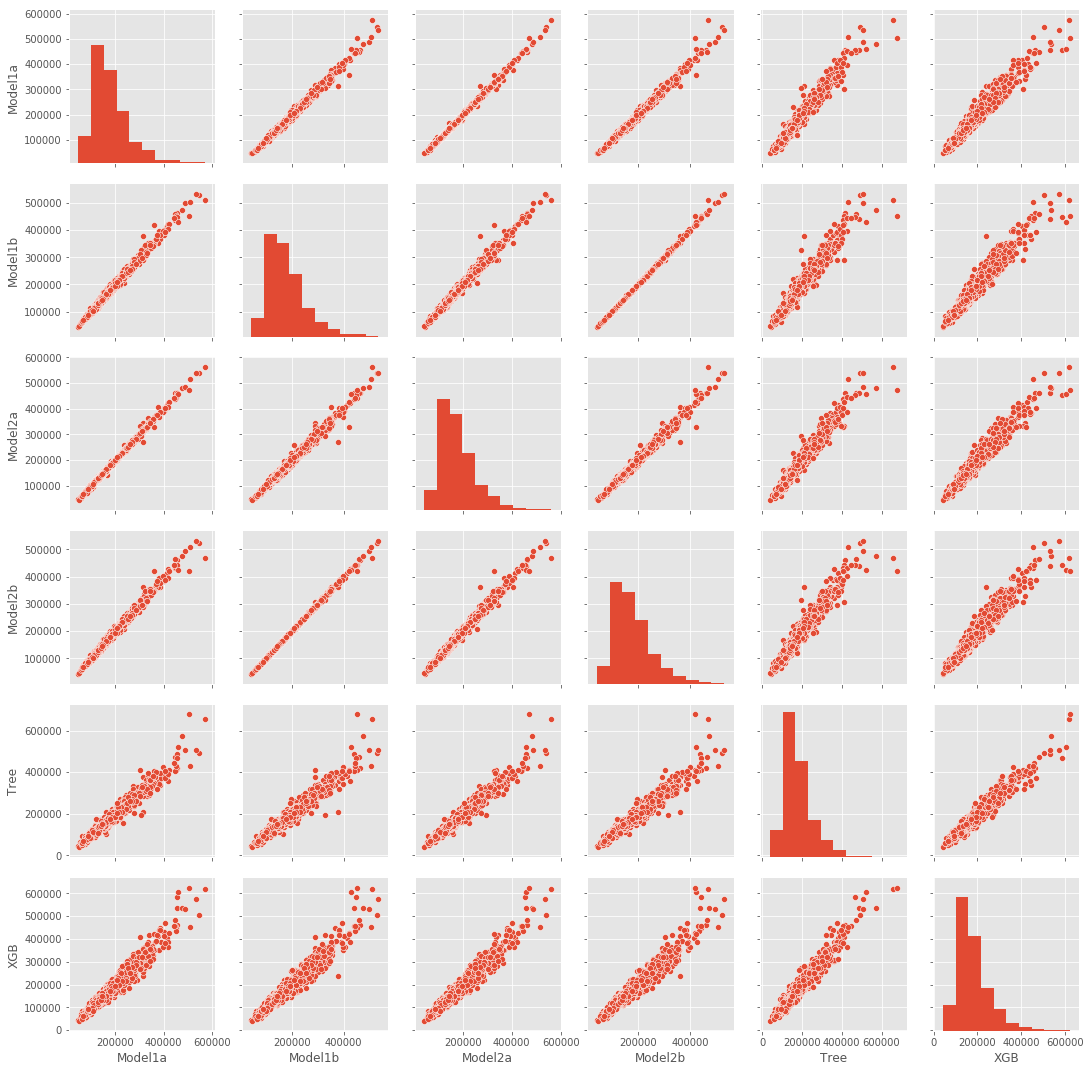

In [19]:
predictions = pd.DataFrame([a1, a2, b1, b2, tr, gb]).T
predictions.columns = ['Model1a', 'Model1b', 'Model2a', 'Model2b', 'Tree', 'XGB']
sns.pairplot(predictions)

Fit Ridge regression

In [20]:
# Divide the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(predictions, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1022, 6)
X_test : (438, 6)
y_train : (1022,)
y_test : (438,)


In [21]:
def rmse_cv(model, X, y):
    '''
    A helper function to calculate the cross validated RMSE
    '''
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = 10))
    return(rmse)

In [22]:
def rmsle(model, X, y):
    '''
    Calculates rmsle as set by Kaggle
    '''
    return (math.sqrt(np.mean(np.log(model.predict(X)) - np.log(y)) ** 2))

Fit model to the new train dataset and compare with new test.

Model train accuracy (rmsle):  0.0003748636922922118
Model test accuracy (rmsle):  0.0021462081756992366


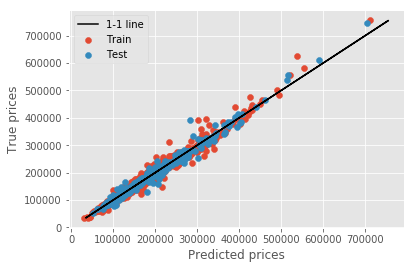

In [23]:
model_tmp = LinearRegression()
model_tmp = model_tmp.fit(X_train,y_train)

print('Model train accuracy (rmsle): ', rmsle(model_tmp, X_train, y_train))
print('Model test accuracy (rmsle): ', rmsle(model_tmp, X_test, y_test))

plt.scatter(model_tmp.predict(X_train), y_train, label='Train')
plt.scatter(model_tmp.predict(X_test), y_test, label='Test')
plt.plot(y, y, c='black', label = '1-1 line')
plt.xlabel('Predicted prices')
plt.ylabel('True prices')
_ = plt.legend()


We train the model on the whole dataset

In [24]:
superLearner = Ridge(alpha=alpha)
superLearner.fit(predictions,y)

scoreSL = rmsle(superLearner, predictions, y)

print('Model accuracy rmsle: ', scoreSL)

NameError: name 'alpha' is not defined

We plot regression coefficients

In [ ]:
coefs = pd.DataFrame({'Feature':predictions.columns.values, 'Coefficient':superLearner.coef_})

# Plot the most important features
coefs['sort'] = coefs.Coefficient.abs()
coefs = coefs.sort_values('sort', ascending=False).drop('sort', axis=1).head(20).sort_values('Coefficient', ascending=False)
plt.barh(coefs.Feature, coefs.Coefficient)

In [ ]:
## Save SuperLearner
pickle.dump(superLearner, open('./tmp/super.model', 'wb'))

## Gradient Boosting

We are using boosted tree to model the prices.

In [ ]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":3, "eta":0.1, "subsample":0.7}
cv_xgb = xgb.cv(params, dtrain,  num_boost_round=1000, early_stopping_rounds=100, verbose_eval=False)


In [ ]:
# Plot cv results
cv_xgb.iloc[5:, [0,2]].plot()

Fit to new test and train sets

In [ ]:
# Fit a model 
model_tmp = xgb.XGBRegressor(n_estimators=10, max_depth=2, learning_rate=0.6, subsample=0.7) #the params were tuned using xgb.cv
model_tmp = model_tmp.fit(predictions, y)

print('Model train accuracy (rmsle): ', rmsle(model_tmp, X_train, y_train))
print('Model test accuracy (rmsle): ', rmsle(model_tmp, X_test, y_test))

plt.scatter(model_tmp.predict(X_train), y_train, label='Train')
plt.scatter(model_tmp.predict(X_test), y_test, label='Test')
plt.plot(y, y, c='black', label = '1-1 line')
plt.xlabel('Predicted prices')
plt.ylabel('True prices')
_ = plt.legend()


Fit to the whole dataset

In [ ]:
xgb_mod = xgb.XGBRegressor(n_estimators=10, max_depth=2, learning_rate=0.6, subsample=0.7) #the params were tuned using xgb.cv
xgb_mod = xgb_mod.fit(predictions, y)

score_xgb = rmsle(xgb_mod, predictions, y)

print('Model accuracy rmse: ', score_xgb)


In [ ]:
## Save SuperLearner
pickle.dump(xgb_mod, open('./tmp/superDT.model', 'wb'))